In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv(r"F:\College\SEM 8\Project Phase 2\Dataset\NCM Preprocessed\master_features_ncm.csv")
df

,filename,cell_id,temp,charge_rate,discharge_rate,cycle,SOH,IC_bin_1,IC_bin_2,IC_bin_3,...,IC_bin_11,IC_bin_12,IC_bin_13,IC_bin_14,IC_bin_15,IC_bin_16,IC_bin_17,IC_bin_18,IC_bin_19,IC_bin_20
0,CY25-05_1-#1.csv,1,25,0.5,1.0,1,99.97,3.357465,3.409897,3.451491,...,5.021976,4.911637,4.812399,4.785613,4.846892,4.955133,5.028157,4.967427,4.813587,4.636538
1,CY25-05_1-#1.csv,1,25,0.5,1.0,2,100.00,3.339344,3.389671,3.434389,...,5.033424,4.925148,4.819168,4.778235,4.833034,4.930445,4.986257,4.965384,4.836134,4.642093
2,CY25-05_1-#1.csv,1,25,0.5,1.0,3,99.97,3.318798,3.375733,3.418148,...,5.061983,4.936415,4.836851,4.792625,4.814920,4.903852,4.990187,4.971119,4.840499,4.645379
3,CY25-05_1-#1.csv,1,25,0.5,1.0,4,99.90,3.299630,3.357853,3.408414,...,5.060183,4.952692,4.837289,4.782553,4.793478,4.880076,4.971722,4.959123,4.836520,4.640515
4,CY25-05_1-#1.csv,1,25,0.5,1.0,5,99.85,3.289120,3.346728,3.391637,...,5.071775,4.949073,4.839425,4.776497,4.792114,4.876835,4.958373,4.967208,4.832506,4.632110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27802,CY45-05_1-#9.csv,9,45,0.5,1.0,403,85.59,2.883249,2.964653,3.036517,...,4.085170,4.354704,4.405743,4.305726,4.152901,3.997500,3.856655,3.744014,3.666139,3.606560
27803,CY45-05_1-#9.csv,9,45,0.5,1.0,404,85.58,2.883626,2.963187,3.029971,...,4.074550,4.361015,4.425483,4.309762,4.144773,3.984830,3.847591,3.742034,3.665588,3.608175
27804,CY45-05_1-#9.csv,9,45,0.5,1.0,405,85.56,2.881560,2.961373,3.028445,...,4.074526,4.346114,4.411981,4.308600,4.149322,3.980736,3.838218,3.746890,3.685100,3.622550
27805,CY45-05_1-#9.csv,9,45,0.5,1.0,406,85.51,2.877917,2.955084,3.026652,...,4.072626,4.351584,4.420646,4.319570,4.154347,3.988897,3.848639,3.742453,3.667496,3.609149


In [5]:
df_one_hot = pd.get_dummies(df, columns=['temp','charge_rate'])
df_one_hot

,filename,cell_id,discharge_rate,cycle,SOH,IC_bin_1,IC_bin_2,IC_bin_3,IC_bin_4,IC_bin_5,...,IC_bin_15,IC_bin_16,IC_bin_17,IC_bin_18,IC_bin_19,IC_bin_20,temp_25,temp_35,temp_45,charge_rate_0.5
0,CY25-05_1-#1.csv,1,1.0,1,99.97,3.357465,3.409897,3.451491,3.507094,3.626893,...,4.846892,4.955133,5.028157,4.967427,4.813587,4.636538,True,False,False,True
1,CY25-05_1-#1.csv,1,1.0,2,100.00,3.339344,3.389671,3.434389,3.496217,3.617999,...,4.833034,4.930445,4.986257,4.965384,4.836134,4.642093,True,False,False,True
2,CY25-05_1-#1.csv,1,1.0,3,99.97,3.318798,3.375733,3.418148,3.478635,3.607095,...,4.814920,4.903852,4.990187,4.971119,4.840499,4.645379,True,False,False,True
3,CY25-05_1-#1.csv,1,1.0,4,99.90,3.299630,3.357853,3.408414,3.470267,3.589665,...,4.793478,4.880076,4.971722,4.959123,4.836520,4.640515,True,False,False,True
4,CY25-05_1-#1.csv,1,1.0,5,99.85,3.289120,3.346728,3.391637,3.451330,3.567914,...,4.792114,4.876835,4.958373,4.967208,4.832506,4.632110,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27802,CY45-05_1-#9.csv,9,1.0,403,85.59,2.883249,2.964653,3.036517,3.081299,3.099746,...,4.152901,3.997500,3.856655,3.744014,3.666139,3.606560,False,False,True,True
27803,CY45-05_1-#9.csv,9,1.0,404,85.58,2.883626,2.963187,3.029971,3.072332,3.092826,...,4.144773,3.984830,3.847591,3.742034,3.665588,3.608175,False,False,True,True
27804,CY45-05_1-#9.csv,9,1.0,405,85.56,2.881560,2.961373,3.028445,3.070919,3.092430,...,4.149322,3.980736,3.838218,3.746890,3.685100,3.622550,False,False,True,True
27805,CY45-05_1-#9.csv,9,1.0,406,85.51,2.877917,2.955084,3.026652,3.076377,3.097413,...,4.154347,3.988897,3.848639,3.742453,3.667496,3.609149,False,False,True,True


In [6]:
# -------------------------
# 1. One-hot encode temp & charge-rate
# -------------------------
#df_one_hot = pd.get_dummies(df, columns=['temp','charge_rate'])

# -------------------------
# 2. Drop useless columns
# -------------------------
df_dropped = df_one_hot.drop(columns=['filename', 'cell_id', 'discharge_rate'])

# -------------------------
# 3. Identify columns
# -------------------------
ic_cols = [col for col in df_dropped.columns if 'IC' in col]      # 20 IC bins
cycle_col = 'cycle'
one_hot_cols = [col for col in df_dropped.columns 
                if 'temp_' in col or 'charge_rate_' in col]

# Target
Y = df_dropped['SOH'].values

# Features before splitting
X_ic_all = df_dropped[ic_cols].values                # shape: (N, 20)
X_cycle_all = df_dropped[[cycle_col]].values         # shape: (N, 1)
X_onehot_all = df_dropped[one_hot_cols].values       # shape: (N, 6)

# -------------------------
# 4. Train/test split
# -------------------------
X_ic_train, X_ic_test, \
X_cycle_train, X_cycle_test, \
X_cat_train, X_cat_test, \
y_train, y_test = train_test_split(
    X_ic_all, X_cycle_all, X_onehot_all, Y,
    train_size=0.8, random_state=42
)

# -------------------------
# 5. Scale IC features
# -------------------------
ic_scaler = StandardScaler()
X_ic_train = ic_scaler.fit_transform(X_ic_train)
X_ic_test = ic_scaler.transform(X_ic_test)

# -------------------------
# 6. Scale cycle number
# -------------------------
cycle_scaler = StandardScaler()
X_cycle_train = cycle_scaler.fit_transform(X_cycle_train)
X_cycle_test = cycle_scaler.transform(X_cycle_test)

# -------------------------
# 7. Build final CONTEXT vector (cycle + one-hot)
# -------------------------
X_context_train = np.concatenate([X_cycle_train, X_cat_train], axis=1)
X_context_test = np.concatenate([X_cycle_test, X_cat_test], axis=1)

# -------------------------
# 8. Normalize SOH target
# -------------------------
y_mean = y_train.mean()
y_std = y_train.std()

y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

# -------------------------
# 9. Reshape IC features for CNN+LSTM (20 timesteps, 1 feature)
# -------------------------
X_ic_train = np.expand_dims(X_ic_train, axis=2)   # shape: (N, 20, 1)
X_ic_test  = np.expand_dims(X_ic_test, axis=2)

print("IC input:", X_ic_train.shape)
print("Context input:", X_context_train.shape)
print("Target:", y_train.shape)


IC input: (22245, 20, 1)
Context input: (22245, 5)
Target: (22245,)


In [8]:
charge_vector = np.tile([0,1,0], (X_context_test.shape[0], 1))
X_context_ncm_final = np.concatenate([X_context_test[:, :4], charge_vector], axis=1)

In [9]:
X_context_ncm_final.shape

(5562, 7)

CNN_LSTM

In [10]:
cnn_lstm = keras.models.load_model(r"F:\College\SEM 8\Project Phase 2\Models\best_cnn_lstm.keras")

174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.0778 - mae: 0.9092
Test MAE (normalized): 0.9092
Test MSE (normalized): 1.0778
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


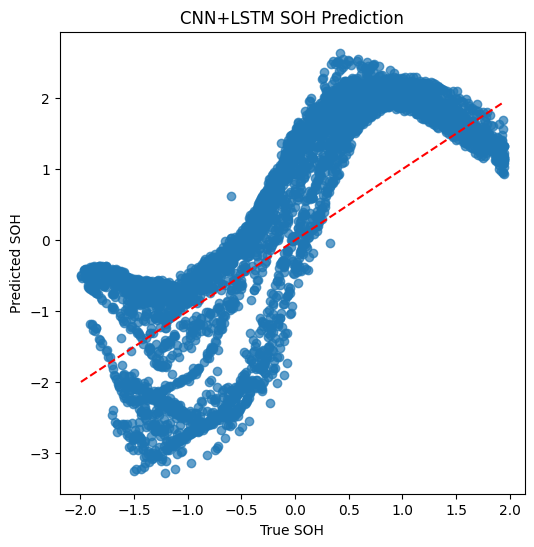

In [11]:
test_loss, test_mae = cnn_lstm.evaluate([X_ic_test, X_context_ncm_final], y_test, verbose=1)
print(f"Test MAE (normalized): {test_mae:.4f}")
print(f"Test MSE (normalized): {test_loss:.4f}")

y_pred = cnn_lstm.predict([X_ic_test, X_context_ncm_final]).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True SOH")
plt.ylabel("Predicted SOH")
plt.title("CNN+LSTM SOH Prediction")
plt.show()

In [12]:
cnn_gru = keras.models.load_model(r"F:\College\SEM 8\Project Phase 2\Models\best_cnn_gru.keras")

174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.9101 - mae: 0.8148
Test MAE (normalized): 0.8148
Test MSE (normalized): 0.9101
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


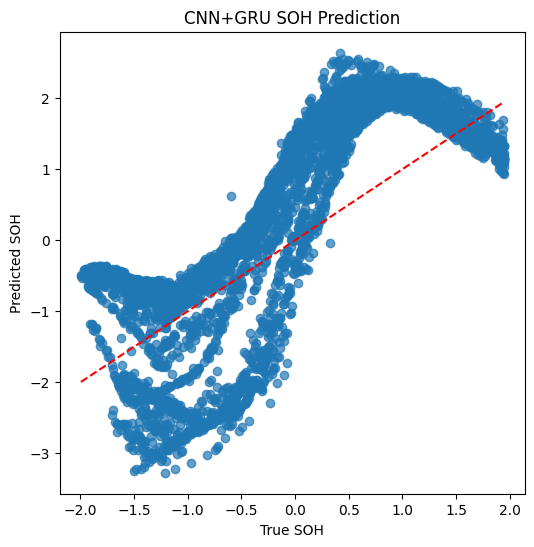

In [13]:
test_loss, test_mae = cnn_gru.evaluate([X_ic_test, X_context_ncm_final], y_test, verbose=1)
print(f"Test MAE (normalized): {test_mae:.4f}")
print(f"Test MSE (normalized): {test_loss:.4f}")

y_pred = cnn_lstm.predict([X_ic_test, X_context_ncm_final]).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True SOH")
plt.ylabel("Predicted SOH")
plt.title("CNN+GRU SOH Prediction")
plt.show()

RCN

In [14]:
rcn = keras.models.load_model(r"F:\College\SEM 8\Project Phase 2\Models\best_rcn.keras")

174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4529 - mae: 0.6047
Test MAE (normalized): 0.6047
Test MSE (normalized): 0.4529
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


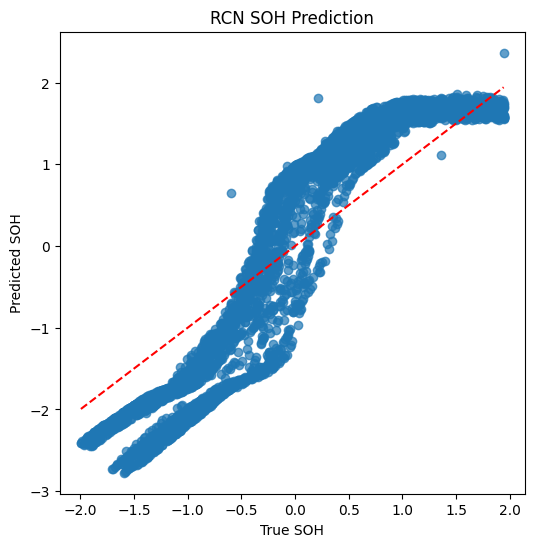

In [15]:
test_loss, test_mae = rcn.evaluate([X_ic_test, X_context_ncm_final], y_test, verbose=1)
print(f"Test MAE (normalized): {test_mae:.4f}")
print(f"Test MSE (normalized): {test_loss:.4f}")

y_pred = rcn.predict([X_ic_test, X_context_ncm_final]).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True SOH")
plt.ylabel("Predicted SOH")
plt.title("RCN SOH Prediction")
plt.show()

CNN

In [16]:
cnn = keras.models.load_model(r"F:\College\SEM 8\Project Phase 2\Models\best_cnn.keras")

174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.2466 - mae: 0.4349
Test MAE (normalized): 0.4349
Test MSE (normalized): 1.2466
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


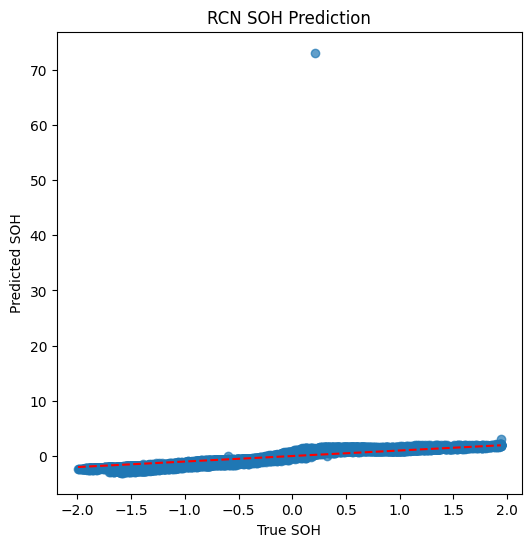

In [17]:
test_loss, test_mae = cnn.evaluate([X_ic_test, X_context_ncm_final], y_test, verbose=1)
print(f"Test MAE (normalized): {test_mae:.4f}")
print(f"Test MSE (normalized): {test_loss:.4f}")

y_pred = cnn.predict([X_ic_test, X_context_ncm_final]).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True SOH")
plt.ylabel("Predicted SOH")
plt.title("RCN SOH Prediction")
plt.show()